¡Hola, Enrique!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Enrique! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

## Descripcion breve del proyecto.
Usando los datos historicos sobre las ventas de juegos como Xbox, Playstation, etc. Se Tiene que identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Cargar librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from math import factorial 
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import ttest_ind, levene

# Paso 1. Abrir el archivo de datos 

In [2]:
df_games = pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Paso 2. Preparar los datos
•	Reemplazar los nombres de las columnas (ponerlos en minúsculas).

•	Conviertir los datos en los tipos necesarios.

In [3]:
#Revisar los datos generales del data frame
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# convertir a minusculas los titulos de las columnas
new_col_names = []

for old_names in df_games.columns:
    name_lowered = old_names.lower()
    new_col_names.append(name_lowered)
df_games.columns = new_col_names    

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# Convertirlos tipos de datos
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())
                                                        
df_games['user_score'] = df_games['user_score'].replace('tbd', pd.NA)                                                           

df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())
                                                           
#df_games['user_score'] = df_games['user_score'].astype('float64')
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce')
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

# Rellenar los campos ausentes del año, tomando el dato del mismo juego en otra plataforma
df_games["year_of_release"] = df_games.groupby("name")["year_of_release"].apply(lambda x: x.ffill().bfill())

print(df_games["year_of_release"].isnull().sum())
df_games[['name','genre','rating']]=df_games[['name','genre','rating']].fillna('UNKNOWN')
df_games.info()

148
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
# eliminar las lineas vacias del año que no se pudieron rellenar
df_games = df_games.dropna(subset=['year_of_release'])
print(df_games["year_of_release"].isnull().sum())
df_games.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB



<div class="alert alert-block alert-info">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores nulos con proxys. Por ejemplo, en este caso las fechas las podemos completar con los registros de otros videojuegos. 
    

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>
-En este data frame en las columnas de nombre y genero solo a 2 filas les faltaba informacion asi que le asignamos la leyenda 'unknown' para completar la cantidad de datos igualitaria entre columnas.

- Para la columna del año de lanzamiento, la convertimos a numerico y usamos coerce para evitar errores con los datos ausentes, luego lo convertimos a int64 y eliminamos los datos ausentes para poder hacer analisis con los periodos de años; la cantidad era de 249, que es menos del 1.5% de todos los datos disponibles, asi que se tomo la decision de eliminarlos para poder realizar los analisis.

- La columna de critic score la convertimos a str y rellenamos los datos ausentes con 'unknown', veremos mas adelante si requerimos hacer algun cambio para poder analizar esta columna

- La columna de user score le rellenamos los datos ausentes con 'unknowm', esta columna tambien tiene TBD con dato, asi que veremos que impato tiewne esta informacion mas adelante, para ver si tenemos que hacer algun cambio.

- La columna de rating, rellenamos los datos ausentes con 'unknown'

Hay muchos datos ausentes; es posible que esto fuera error humano de omision. veremos que tanto impacta esta ausencia de iformacion en nuestro calculos, o si se puede ignorar para evaluar las necesidades que solicita este proyecto.
</div>

In [7]:
# creamos una columna nueva para realizar la suma total de ventas y mostramos algunos datos para comprobar el resultado
df_games['total_sum'] = df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']
print(df_games.columns)
df_games.head(5)
df_games.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sum'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sum        16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usag

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente en estos casos cuando trabajamos con distribuciones sesgadas como en este caso se recomienda completar los valores nulos con la mediana para no sesgar nuestros resultados




<div class="alert alert-block alert-info">
<b>RESPUESTA DEL ESTUDIANTE</b> <a class="tocSkip"></a>
    
Ya corregimos el codigo, primero en la columna de critic_score que ya era de tipo float, rellenamos los campos vacios con la mediana de los datos en vez de eliminarlos.
    
Con la columna de user_score, primero borramos los campos que decian 'tbd' y los dejamos vacios, para luego convertir los datos a numerico, y despues rellenar los datos vacios con la mediana.

D e esta forma, la cantidad de datos en ambas columnas ya alcanzaba la cifra del dataframe original.
    
En el caso de la columna de year_of_release, hicimos un rellenado de los espacios vacios, tomando el valor del año del mismo nombre de juego pero mencionado en alguna otra plataforma; aun haciendo esto nos quedaros 148 campos vacios que ya no se pudieron rellenar, por lo que se opto por eliminar estas lineas.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste!

# Paso 3. Analizar los datos
•	Cuántos juegos fueron lanzados en diferentes años.
 
•	¿Son significativos los datos de cada período?

Total de juegos lanzados por periodo
1980-1989     205
1990-1999    1771
2000-2009    9268
2010-2016    5323
Name: Period, dtype: int64

Porcentaje de juegos lanzados por periodo
1980-1989     1.237400
1990-1999    10.689926
2000-2009    55.942536
2010-2016    32.130138
Name: Period, dtype: float64


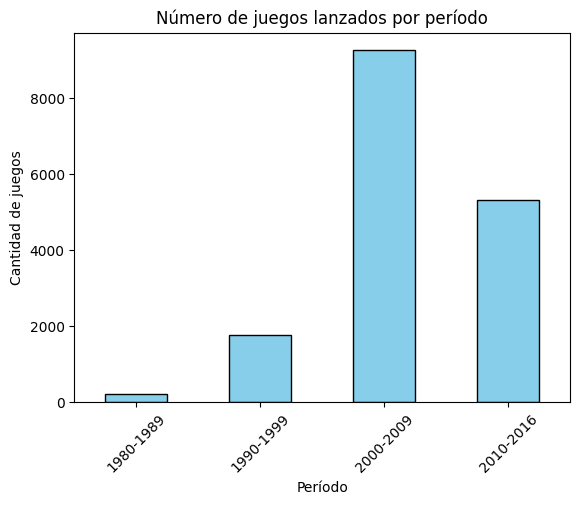

In [8]:
decada = [1980, 1990, 2000, 2010, 2020]
periodos = ['1980-1989', '1990-1999', '2000-2009', '2010-2016']

# Crear una nueva columna para los períodos
df_games['Period'] = pd.cut(df_games['year_of_release'], bins=decada, labels=periodos, right=False)

# Contar cuántos juegos fueron lanzados en cada período
period_counts = df_games['Period'].value_counts().sort_index()
print('Total de juegos lanzados por periodo')
print(period_counts)

# Calcular el porcentaje que representa cada período
total_games = period_counts.sum()
percentage_period_counts = (period_counts / total_games) * 100

# Mostrar los resultados
print()
print('Porcentaje de juegos lanzados por periodo')
print(percentage_period_counts)

period_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de juegos lanzados por período')
plt.xlabel('Período')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>
Observando los datos calculados y realizando la grafica de juegos lanzados por periodo, podemos observar que durante la decada de los 80 la cantidad de juegos lanzados fue muy poca en comparacion con las otras decadas
</div>

•	Observa cómo varían las ventas de una plataforma a otra. 

•	Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

•	Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

•	¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

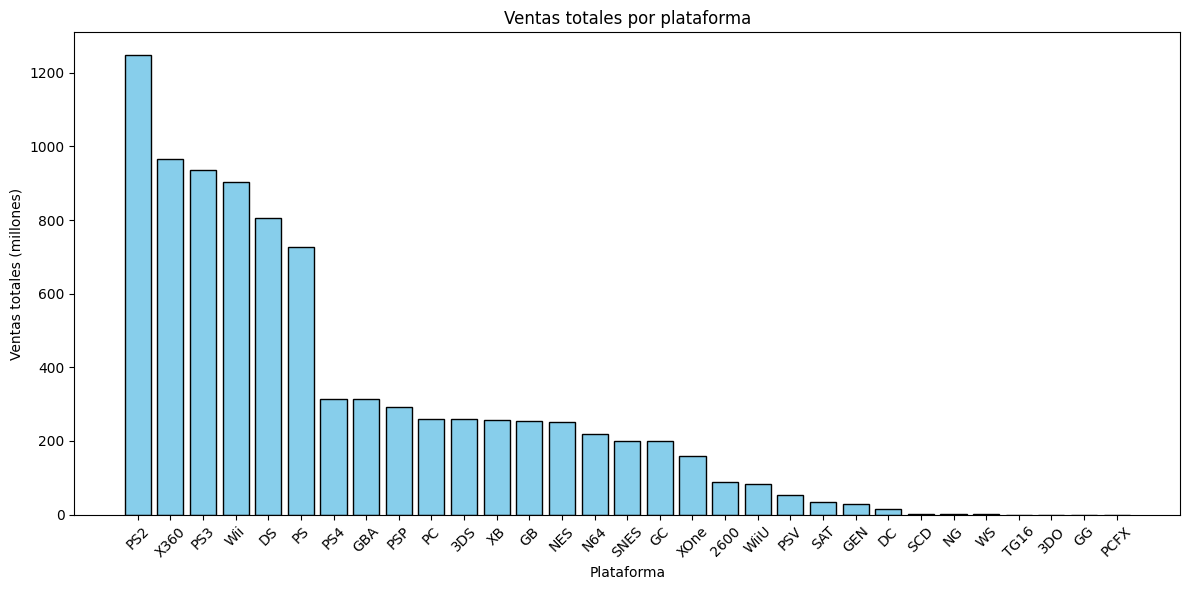

In [9]:
# Calcular las ventas totales por plataforma
sales_by_platform = df_games.groupby('platform')['total_sum'].sum()

# Ordenar las plataformas por ventas totales
sales_by_platform = sales_by_platform.sort_values(ascending=False)

# Histograma de las ventas totales por plataforma
plt.figure(figsize=(12, 6))
plt.bar(sales_by_platform.index, sales_by_platform, color='skyblue', edgecolor='black')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

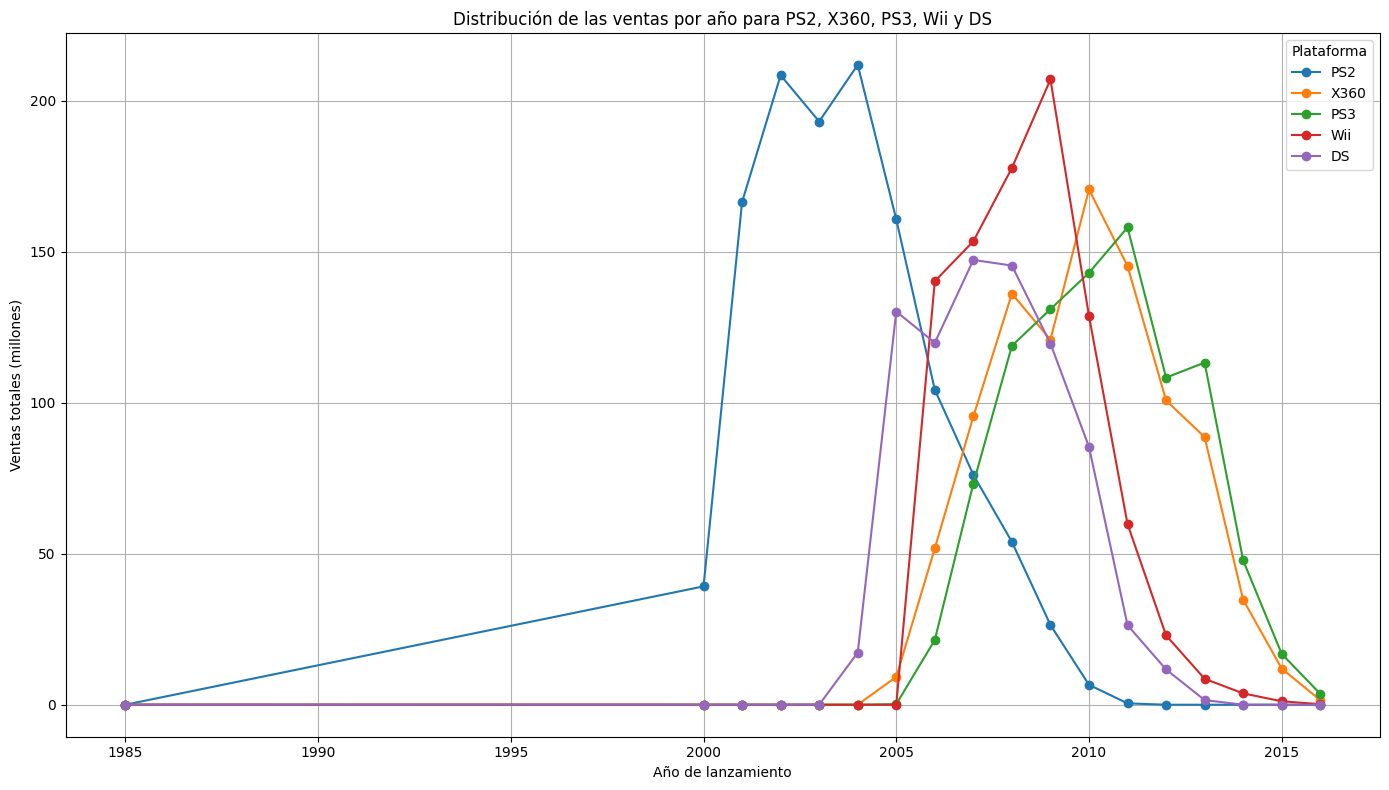

In [10]:
# Filtrar las plataformas de interés
platforms_of_interest = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
filtered_df = df_games[df_games['platform'].isin(platforms_of_interest)]

# Calcular las ventas totales por año y plataforma
sales_by_year_platform = filtered_df.groupby(['year_of_release', 'platform'])['total_sum'].sum().unstack().fillna(0)

# Visualización: Distribución de las ventas por año para las plataformas seleccionadas (gráfico tipo campana)
plt.figure(figsize=(14, 8))
for platform in platforms_of_interest:
    plt.plot(sales_by_year_platform.index, sales_by_year_platform[platform], marker='o', label=platform)

plt.title('Distribución de las ventas por año para PS2, X360, PS3, Wii y DS')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>
    
En este grafico podemos ver como las 5 plataformas con mas ventas tienen su repunte y su baja de ventas a traves de los años.
</div>

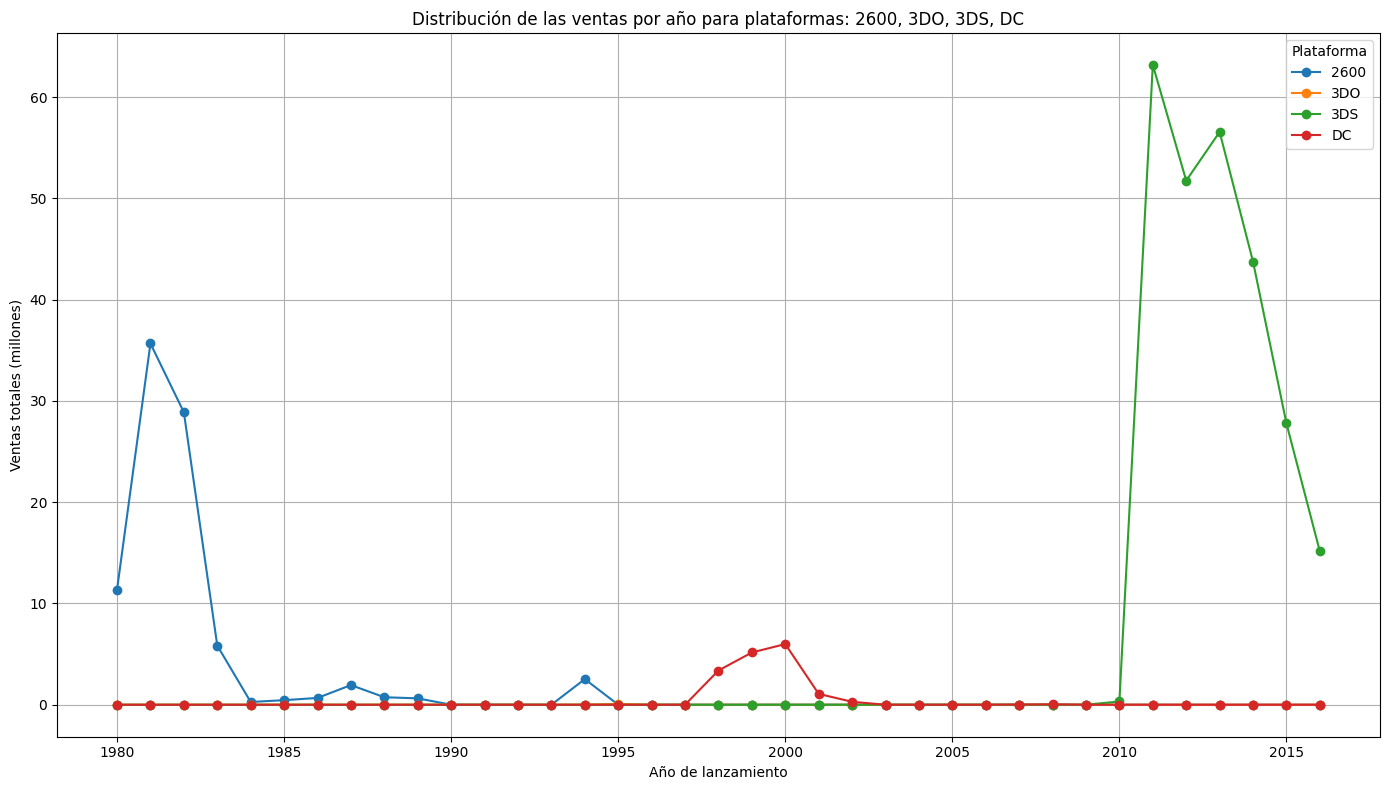

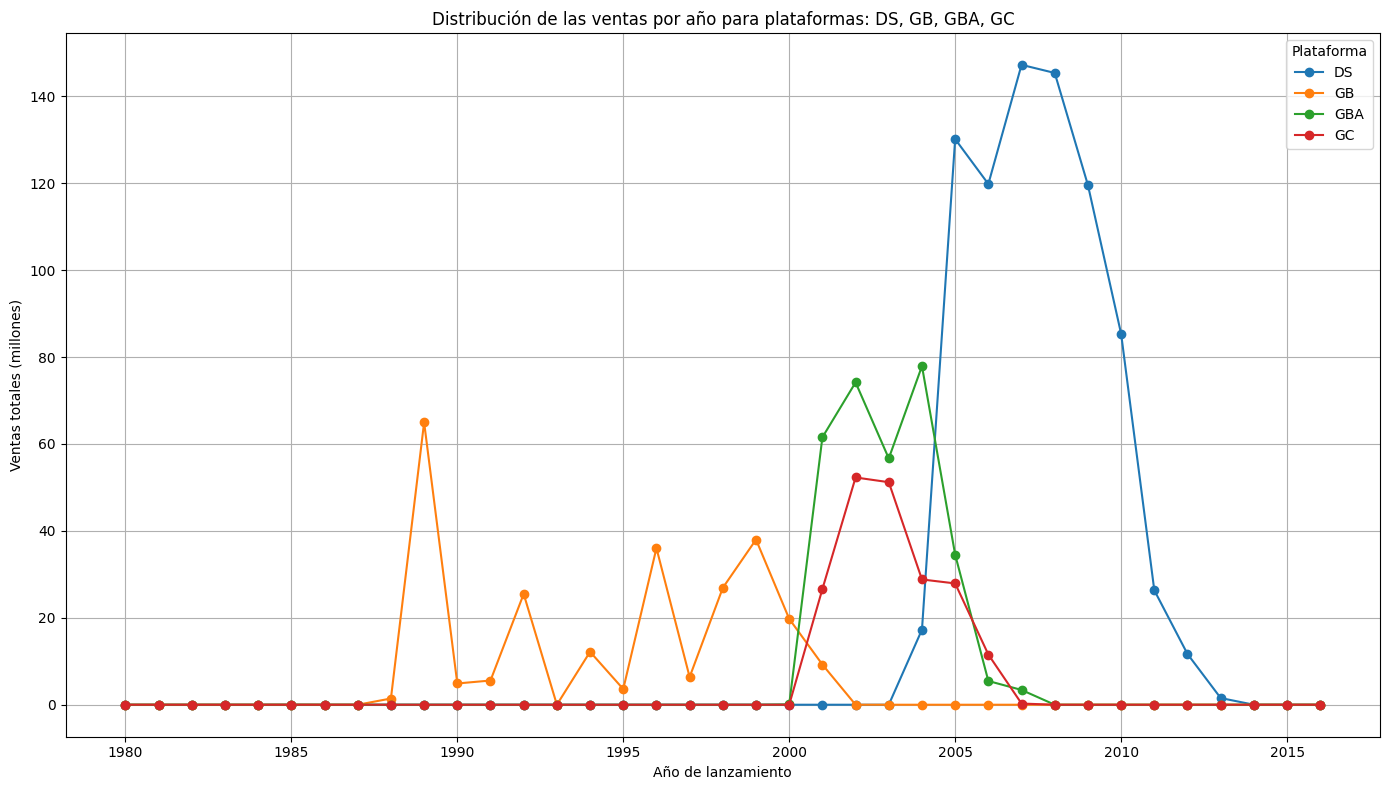

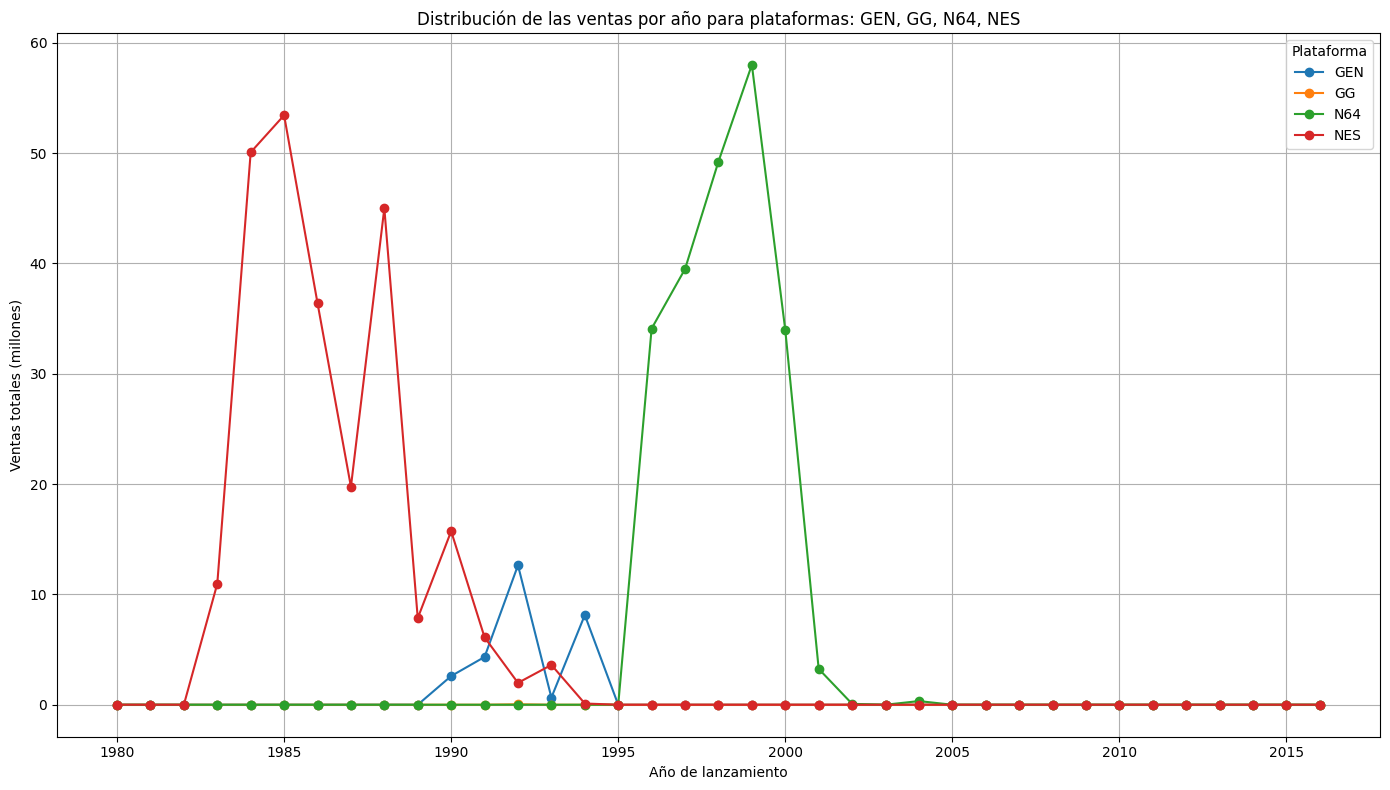

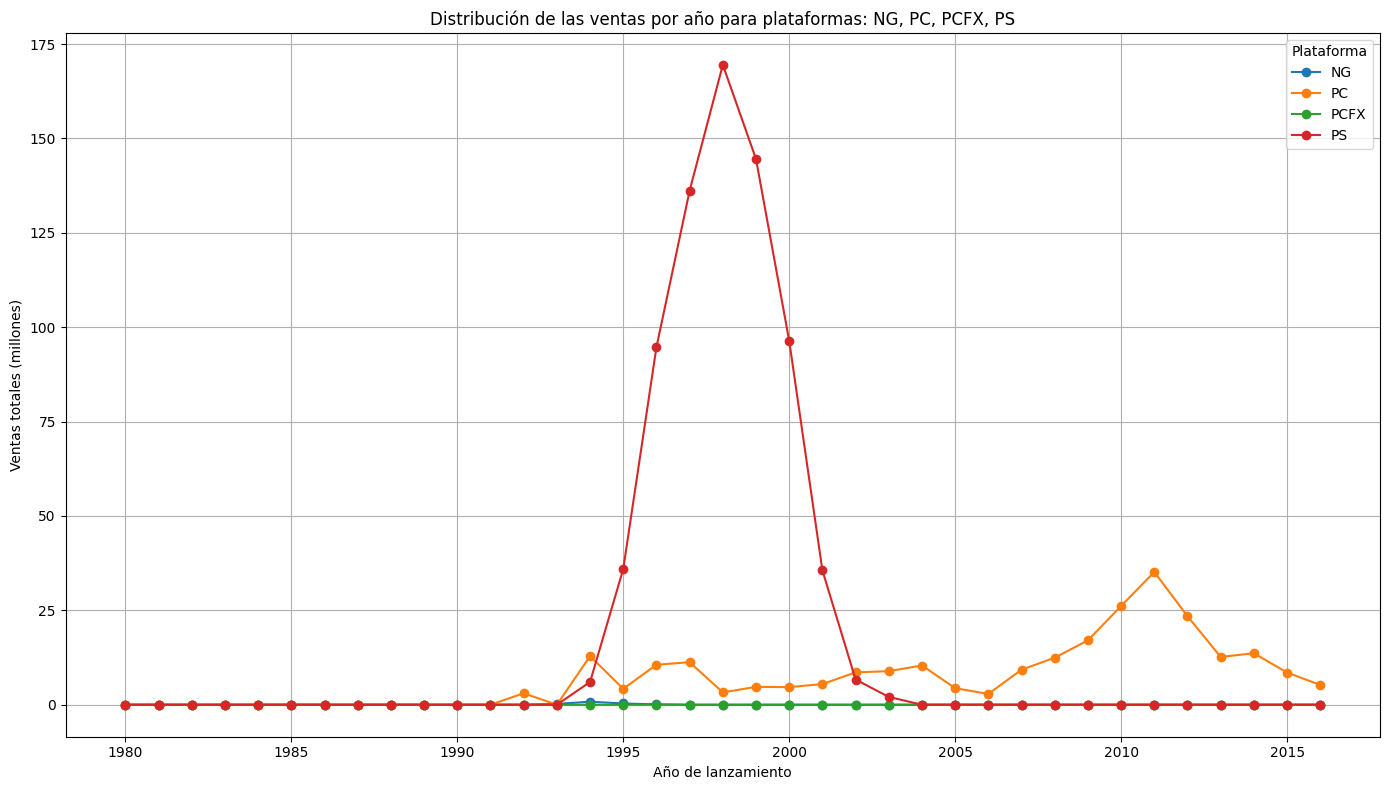

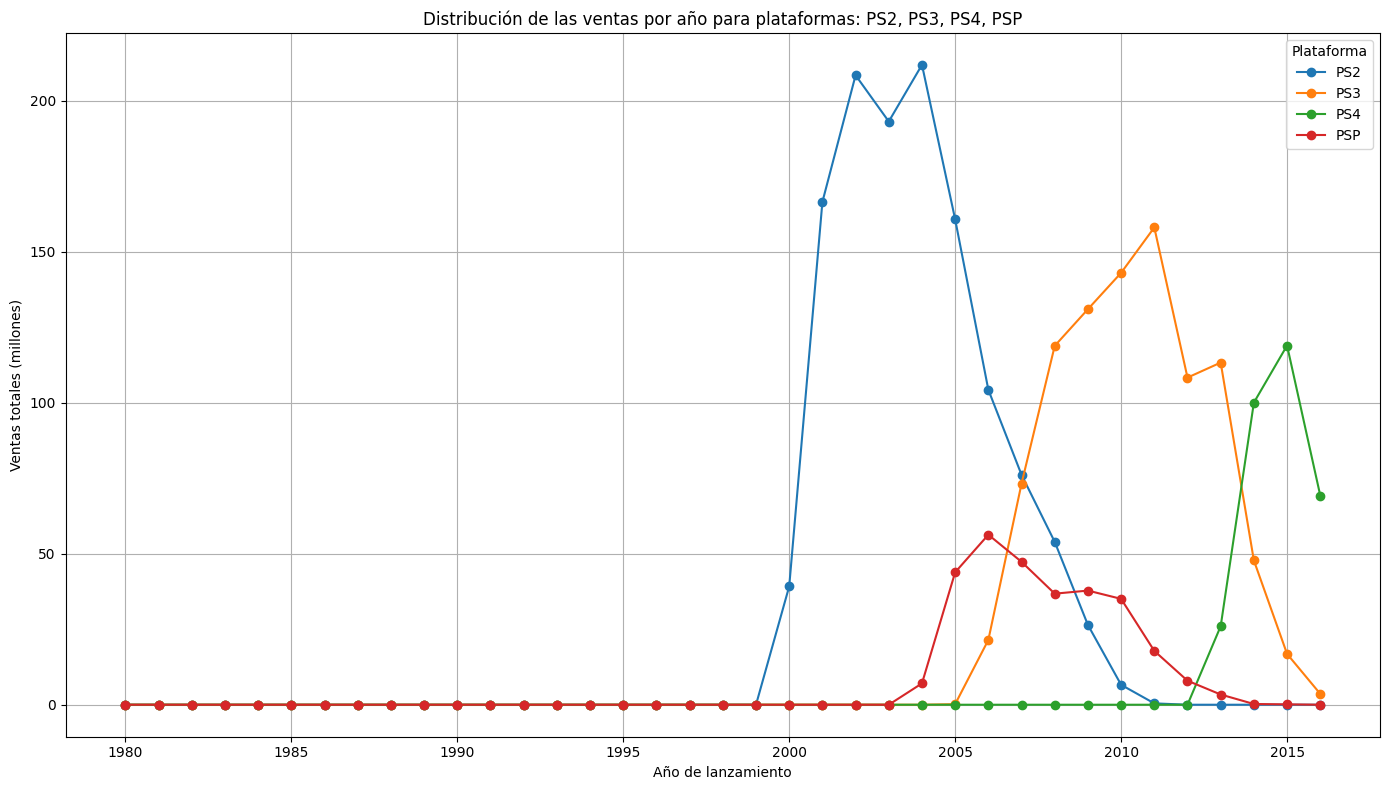

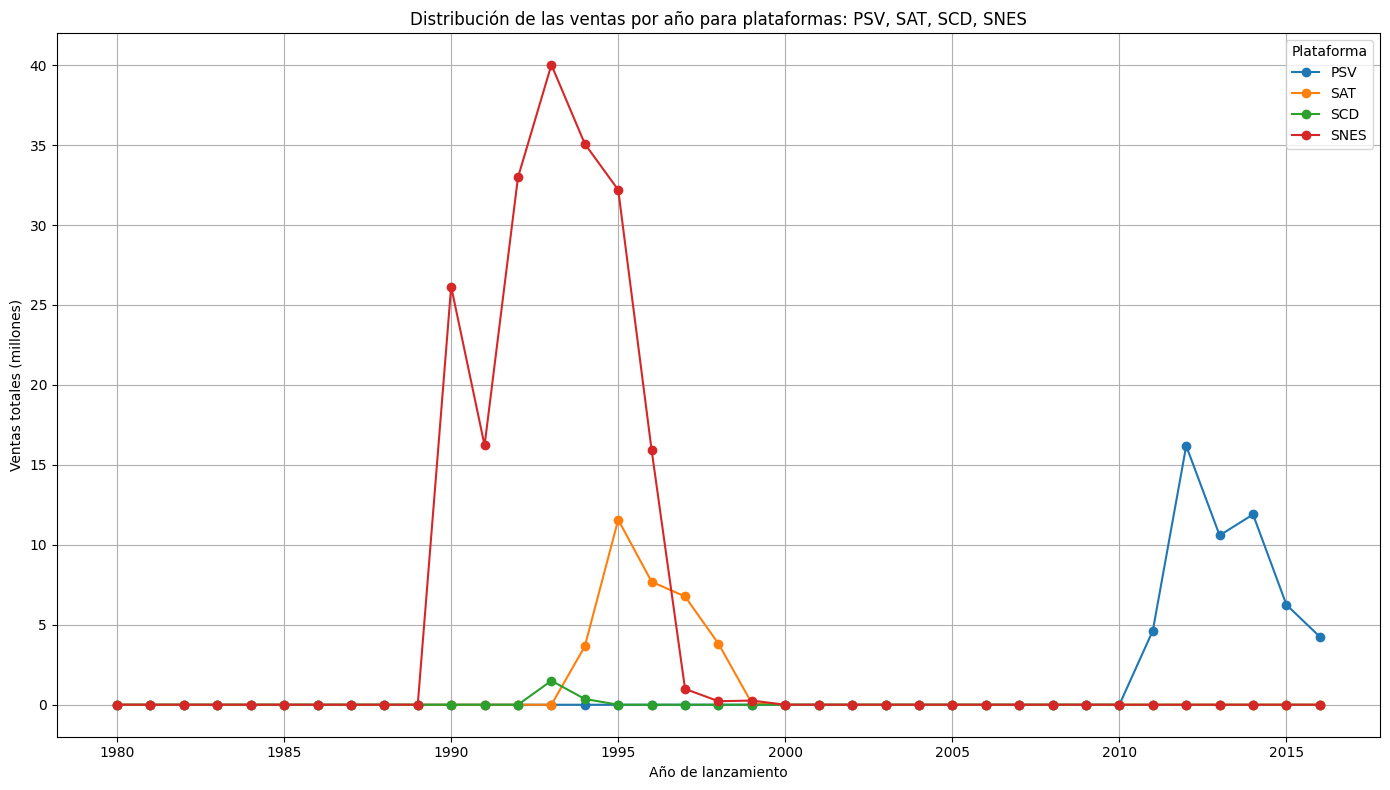

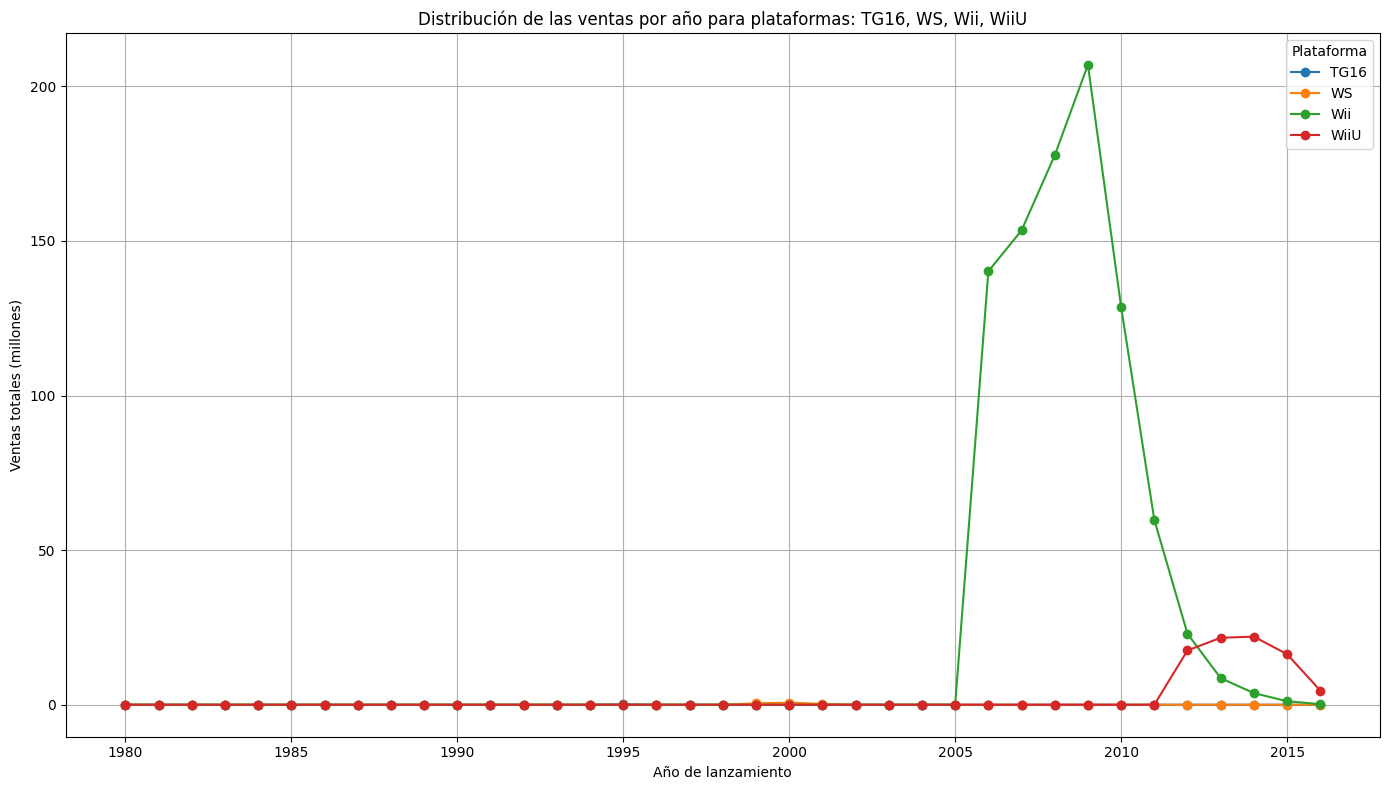

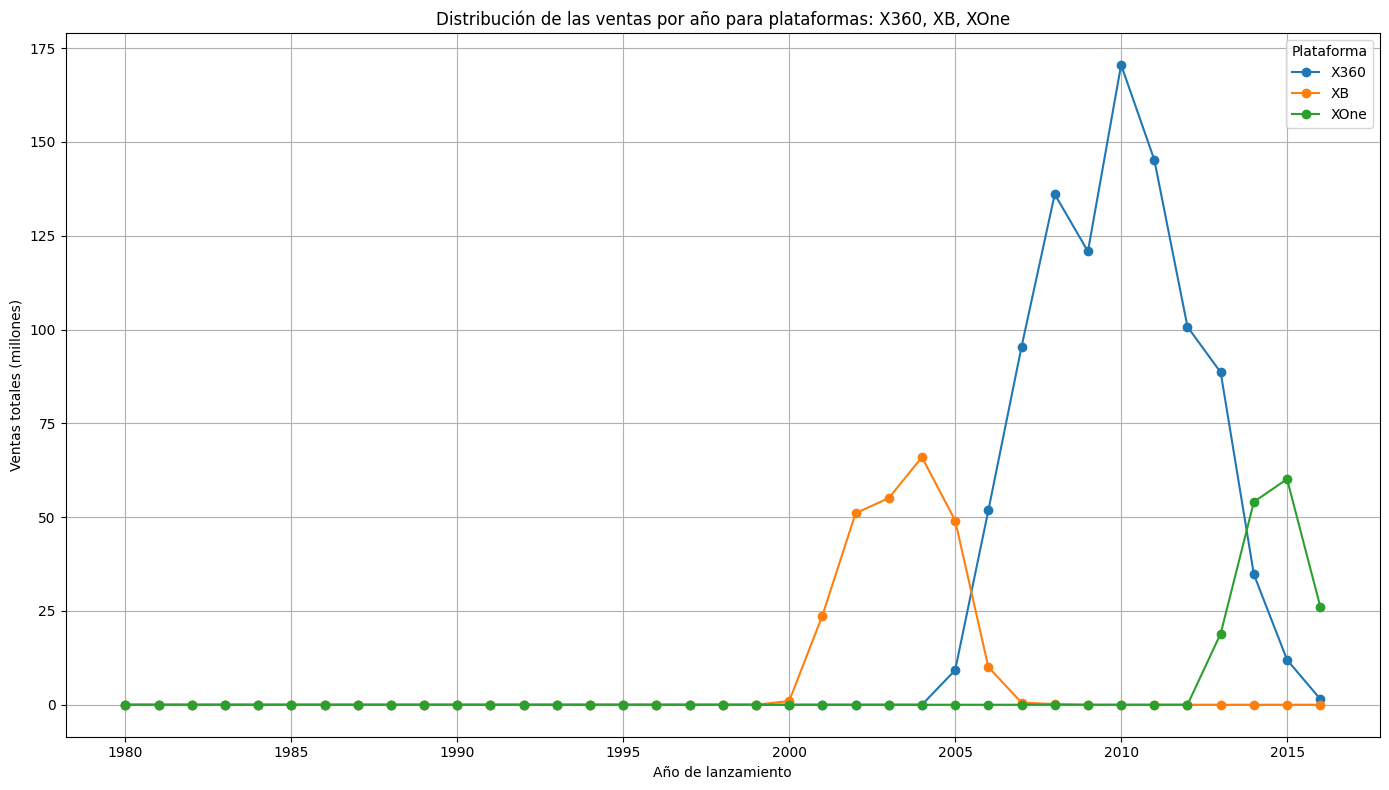

In [11]:
# Calcular las ventas totales por año y plataforma
sales_by_year_platform = df_games.groupby(['year_of_release', 'platform'])['total_sum'].sum().unstack().fillna(0)

platforms = sales_by_year_platform.columns.tolist()

# Dividir las plataformas en grupos de 4
platform_groups = [platforms[i:i + 4] for i in range(0, len(platforms), 4)]

for group in platform_groups:
    plt.figure(figsize=(14, 8))
    for platform in group:
        plt.plot(sales_by_year_platform.index, sales_by_year_platform[platform], marker='o', label=platform)
    
    plt.title('Distribución de las ventas por año para plataformas: ' + ', '.join(group))
    plt.xlabel('Año de lanzamiento')
    plt.ylabel('Ventas totales (millones)')
    plt.legend(title='Plataforma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

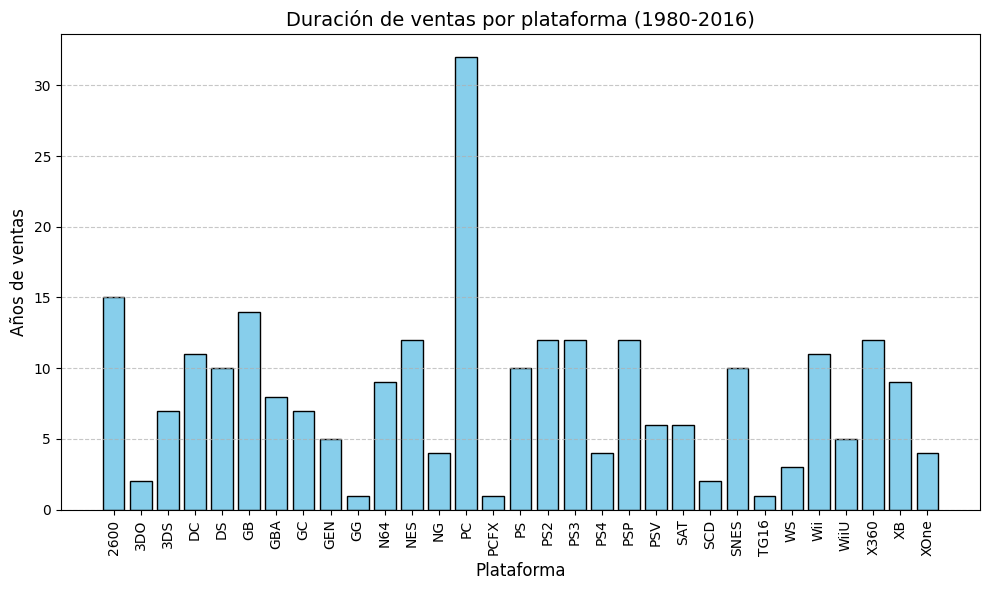

In [12]:
df_games = df_games[~((df_games["platform"] == "DS") & (df_games["year_of_release"] == 1985))]
df_games = df_games[(df_games["year_of_release"] >= 1980) & (df_games["year_of_release"] <= 2016)]

# Calcular el rango de años para cada plataforma
platform_years = df_games.groupby("platform")["year_of_release"].agg(["min", "max"])
platform_years["duration"] = platform_years["max"] - platform_years["min"] + 1

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(platform_years.index, platform_years["duration"], color="skyblue", edgecolor="black")
plt.title("Duración de ventas por plataforma (1980-2016)", fontsize=14)
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("Años de ventas", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [13]:
mean_duration = platform_years["duration"].mean()

print(f"La media de años de ventas de las plataformas es: {mean_duration:.2f} años")

median_duration = platform_years["duration"].median()

print(f"La mediana de años de ventas de las plataformas es: {median_duration:.2f} años")

La media de años de ventas de las plataformas es: 8.29 años
La mediana de años de ventas de las plataformas es: 8.00 años


<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>
Observando las graficas anteriores, se puede notar que las plataformas antiguas podian durar 10 años o mas, pero a partir del año 2000 se empieza a notar lanzamiento de mas plataformas y que estas tienden a durar menos en el mercado, aparentemente de 5 a 10 años cuando mucho.
por eso hicimos otra grafica para ver los años que duraron en el mercado cada plataforma, y en promedio se calculan 8 años en el mercado por plataforma.
Para continuar con el analisis, consideraremos los datos de las plataformas que estan a partir del año 2000 en adelante
</div>

In [14]:
#Eliminaremos todos los datos anteriores al año 2000
df_games = df_games[~(df_games["year_of_release"] < 2005)]

df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11363 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             11363 non-null  object  
 1   platform         11363 non-null  object  
 2   year_of_release  11363 non-null  Int64   
 3   genre            11363 non-null  object  
 4   na_sales         11363 non-null  float64 
 5   eu_sales         11363 non-null  float64 
 6   jp_sales         11363 non-null  float64 
 7   other_sales      11363 non-null  float64 
 8   critic_score     11363 non-null  float64 
 9   user_score       11363 non-null  float64 
 10  rating           11363 non-null  object  
 11  total_sum        11363 non-null  float64 
 12  Period           11363 non-null  category
dtypes: Int64(1), category(1), float64(7), object(4)
memory usage: 1.1+ MB


# continuacion del analisis

•	¿Qué plataformas son líderes en ventas? 

•	¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

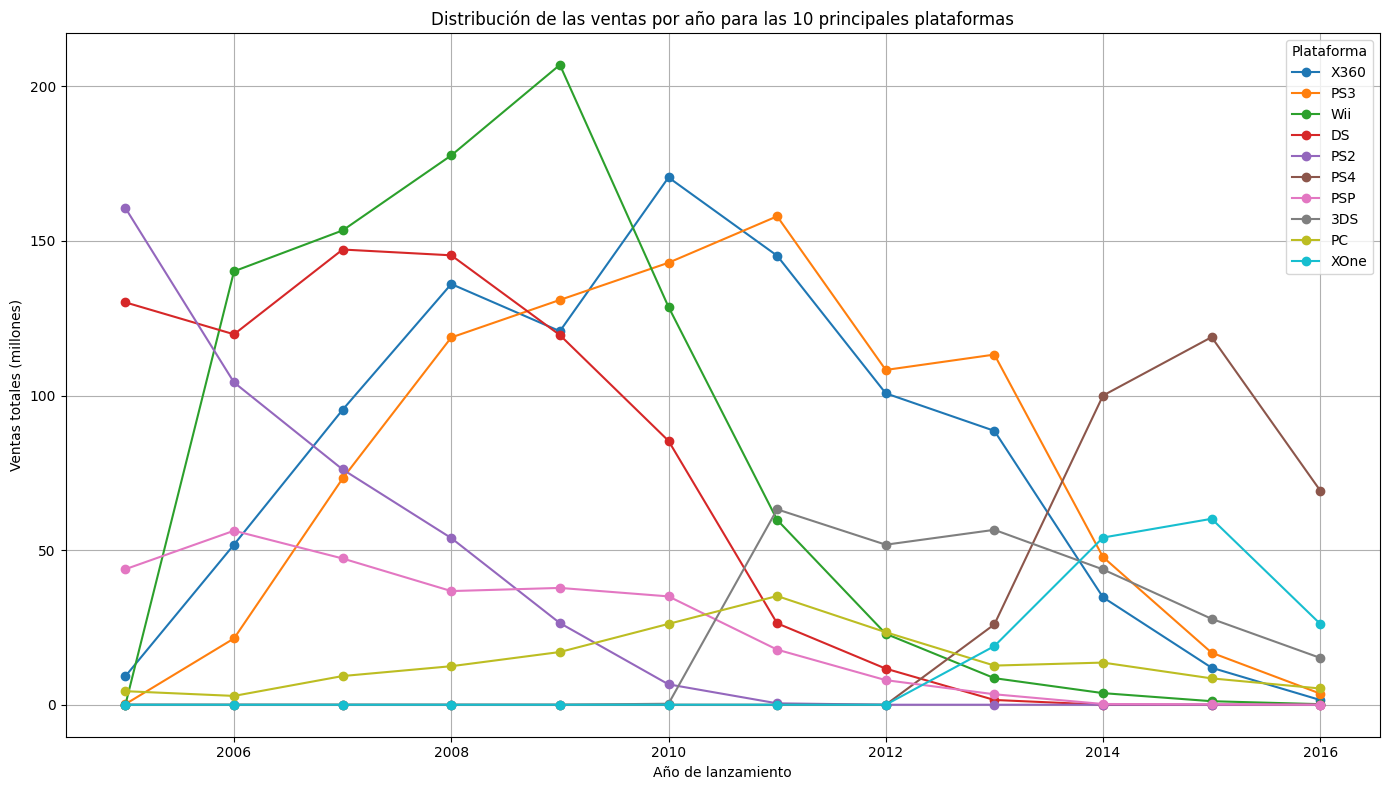

In [15]:
# Calcular las ventas totales por plataforma
total_sales_by_platform = df_games.groupby('platform')['total_sum'].sum()

# filtrar las 10 principales plataformas
top_10_platforms = total_sales_by_platform.nlargest(10).index.tolist()
top_10_df = df_games[df_games['platform'].isin(top_10_platforms)]
sales_by_year_top_10 = top_10_df.groupby(['year_of_release', 'platform'])['total_sum'].sum().unstack().fillna(0)

# Gráficar las ventas anuales 
plt.figure(figsize=(14, 8))
for platform in top_10_platforms:
    plt.plot(sales_by_year_top_10.index, sales_by_year_top_10[platform], marker='o', label=platform)

plt.title('Distribución de las ventas por año para las 10 principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>
En la grafica colocamos las 10 plataformas con mayores ventas en los ultimos años, y se puede observar que las plataformas como PS que tienen lanzamientos secuenciales, estas tienen crecimiento cercano a su año de lanzamiento y cuando empiezan a decender es cuando se lanza la siguiente consola, por ejemplo PS3 y luego PS4.
Las plataformas que se ven mas rentables son XONE y PS4 que son las que mas generan ventas en menos tiempo considerando las fechas mas recientes.
La plataforma PC se ha mantenido con ventas durante mucho tiempo, pero sus ventas no son tan altas en comparacion con las mencionadas anteriormente, que en poco tiempo generaron mas dinero.
</div>

•	Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

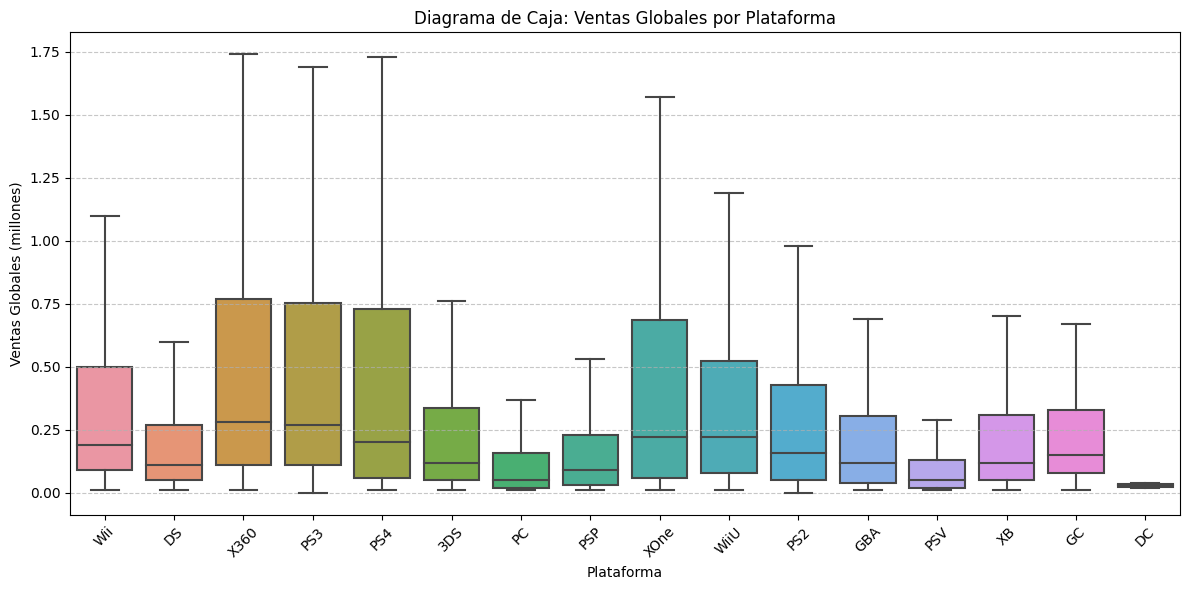

In [16]:
global_sales = df_games[['platform', 'total_sum']]

plt.figure(figsize=(12, 6))
sns.boxplot(data=global_sales, x='platform', y='total_sum', showfliers=False)
plt.title('Diagrama de Caja: Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Calcular la media de las ventas por plataforma y realizar grafico de barras

   Platform  Mean Sales
0       3DS    0.502000
1        DC    0.030000
2        DS    0.373867
3       GBA    0.238407
4        GC    0.277832
5        PC    0.207079
6       PS2    0.399944
7       PS3    0.708477
8       PS4    0.801378
9       PSP    0.241170
10      PSV    0.125431
11      Wii    0.694320
12     WiiU    0.559116
13     X360    0.773288
14       XB    0.243333
15     XOne    0.645020


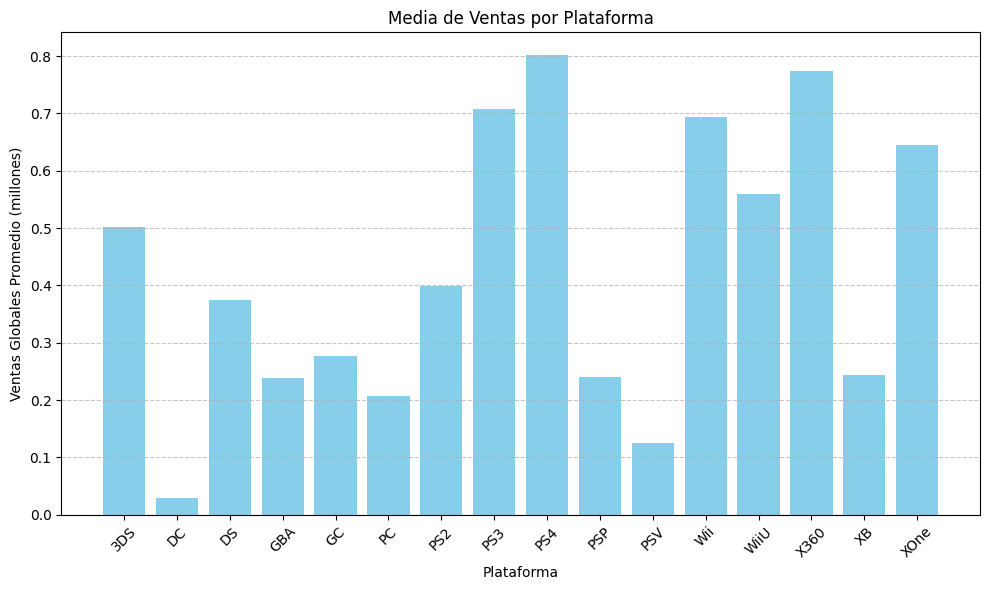

In [17]:
# Agrupar por plataforma y calcular la media de ventas
platform_mean_sales = df_games.groupby('platform')['total_sum'].mean().reset_index()

platform_mean_sales.columns = ['Platform', 'Mean Sales']

print(platform_mean_sales)

# Visualizar en un gráfico de barras

plt.figure(figsize=(10, 6))
plt.bar(platform_mean_sales['Platform'], platform_mean_sales['Mean Sales'], color='skyblue')
plt.title('Media de Ventas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales Promedio (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

En los calculos de las medias y la grafica anterior se puede observar que hay variacion entre cada plataforma, segun el promedio de sus ventas anuales.
Hay plataformas que tienen muy bajas sus ventas y resalta la competencia entre las plataformas de la familia Playsation vs las Xbox, tambien nintendo esta en la pelea con los dispositivos Wii
</div>

# Analisis de impacto de reseñas a las ventas

Analizar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular como la PS4. 

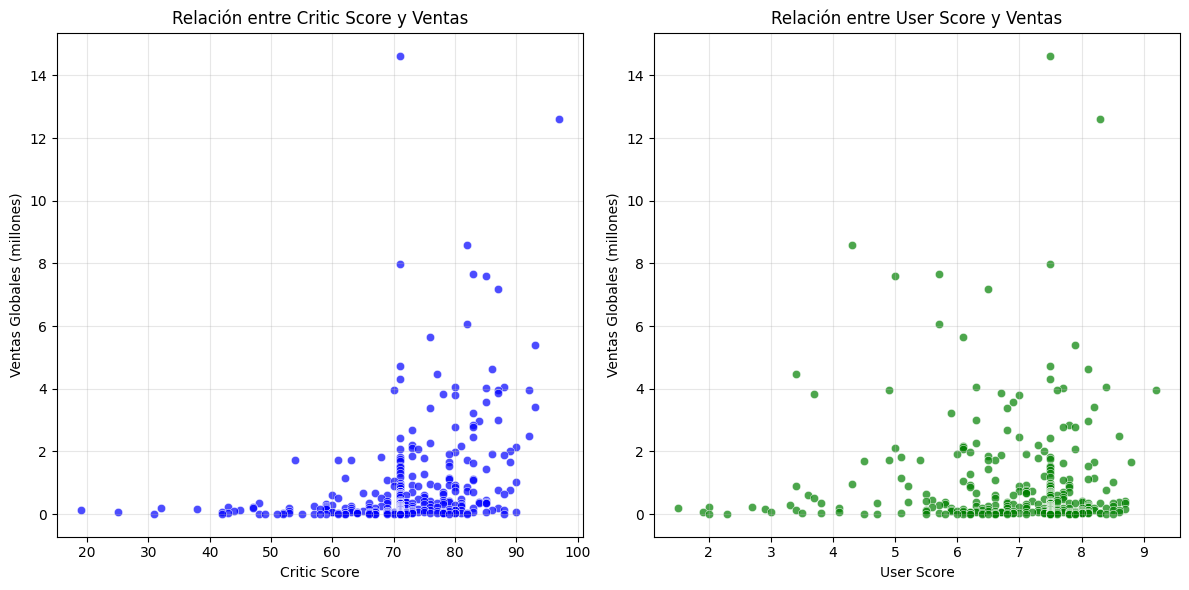

Correlación entre Critic Score y Ventas: 0.3387064530024634
Correlación entre User Score y Ventas: -0.06275557891282788


In [18]:
#filtramos el dataframe para la PS4
ps4_data = df_games[df_games['platform'] == 'PS4'].copy()
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
ps4_data['critic_score'] = pd.to_numeric(ps4_data['critic_score'], errors='coerce')
df_clean = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sum'])

# Gráfico de dispersión entre 'critic_score' y ventas globales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='critic_score', y='total_sum', alpha=0.7, color='blue')
plt.title('Relación entre Critic Score y Ventas')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(alpha=0.3)

# Gráfico de dispersión entre 'user_score' y ventas globales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='user_score', y='total_sum', alpha=0.7, color='green')
plt.title('Relación entre User Score y Ventas')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales (millones)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#Calcular correlaciones
critic_corr = df_clean['critic_score'].corr(df_clean['total_sum'])
user_corr = df_clean['user_score'].corr(df_clean['total_sum'])

print(f"Correlación entre Critic Score y Ventas: {critic_corr}")
print(f"Correlación entre User Score y Ventas: {user_corr}")

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el análisis de la relación de score con las ventas

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Al observar las graficas de dispersion, para la grafica de reseña de los profesionales, parece haber cirto impacto en incremento de ventas si la calificacion va subiendo.

En el caso de la grafica de las reseñas de los usuarios, esta parece no tener impacto en las ventas independietemente de su calificacion.
</div>

In [19]:
# Filtrar los juegos que aparecen en múltiples plataformas
multi_platform_games = df_games.groupby('name').filter(lambda x: x['platform'].nunique() > 1)

platform_sales = multi_platform_games.groupby(['name', 'platform'])['total_sum'].sum().reset_index()


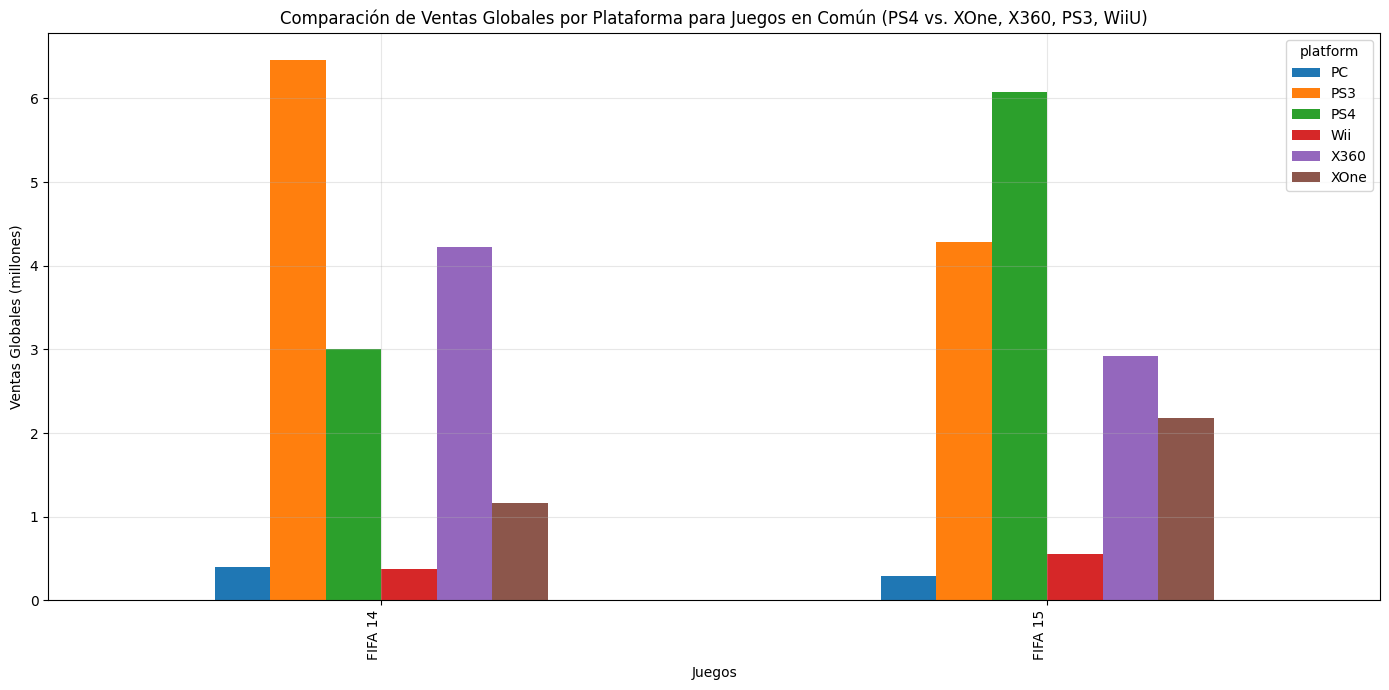

In [20]:
# Elegimos filtrar los juegos únicos de PS4  
ps4_games = ps4_data['name'].unique()  

# filtramos el dataframe para comparar los uegos de PS4 con otras plataformas importantes 
target_platforms = ['XOne','X360','PS4','PC','PS3','Wii']  
matching_games = df_games[df_games['name'].isin(ps4_games) & df_games['platform'].isin(target_platforms)]  
 
platform_sales = matching_games[['platform', 'name', 'total_sum']]  

# Pivotea los datos para facilitar la comparación y elimina filas con NaN  
pivot_table = platform_sales.pivot_table(index='name', columns='platform', values='total_sum', aggfunc='sum')  
pivot_table = pivot_table.dropna()  

# Gráficar  
pivot_table.plot(kind='bar', figsize=(14, 7))  
plt.title('Comparación de Ventas Globales por Plataforma para Juegos en Común (PS4 vs. XOne, X360, PS3, WiiU)')  
plt.ylabel('Ventas Globales (millones)')  
plt.xlabel('Juegos')  
plt.xticks(rotation=90, ha='right')  
plt.grid(alpha=0.3)  
plt.tight_layout()  
plt.show()  


<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Al hacer una comparacion con las pplataformas con mas auge, y que el juego se halla vendido en todas estas plataformas, obtuvimos como resultado que solo el juego de FIFA14 y FIFA 15 se vendieron en las plataformas seleccionadas. para el primer juego la consola PS3 domino en ventas y el siguiente año la consola PS4 fue la lider.
</div>

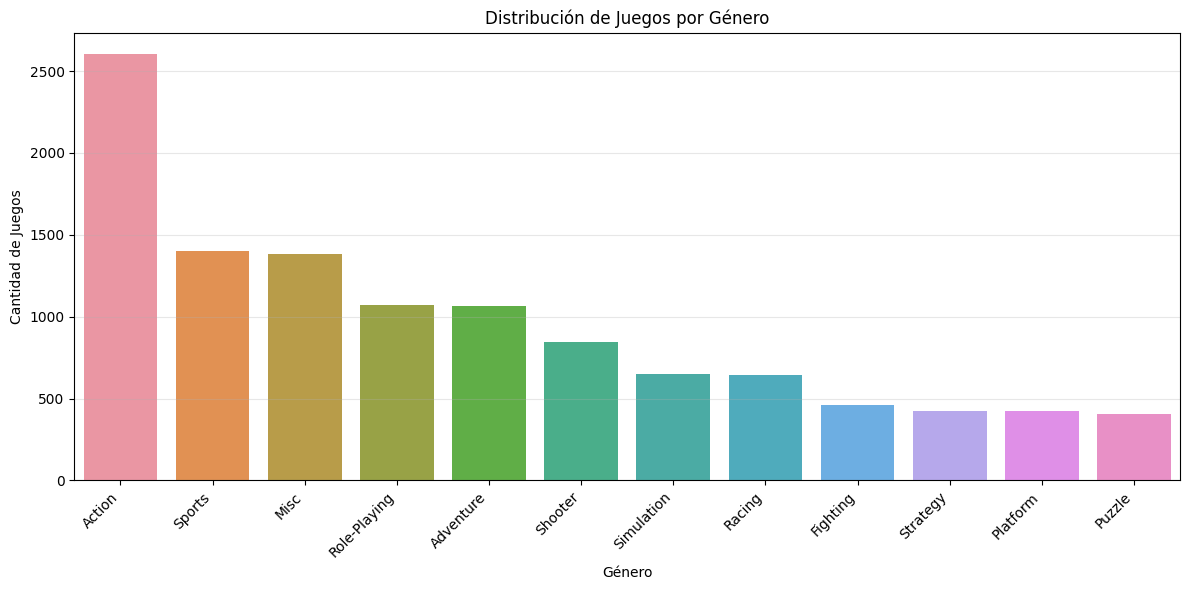

In [21]:
# Contar la cantidad de juegos por género  
genre_counts = df_games['genre'].dropna().value_counts()  

# Crear un gráfico de barras de la distribución por género  
plt.figure(figsize=(12, 6))  
sns.barplot(x=genre_counts.index, y=genre_counts.values)    
plt.title('Distribución de Juegos por Género')  
plt.xlabel('Género')  
plt.ylabel('Cantidad de Juegos')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', alpha=0.3)  
plt.tight_layout()  
plt.show() 

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Con este grafico se puede observar la distribucion de ventas de los juegos por genero, poniendo en primer lugar a los juegos de accion, deportes y demas.

el tercer puesto lo tiene miscelaneos, pero esto no puede considerarse como dato valido, ya que dentro de esta categoria puede haber mucha variedad de categorias de juegos sin una clasificacion clara.
</div>

# Paso 4. Crear un perfil de usuario para cada región

Para cada región (NA, UE, JP) determinar:

•	Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado de una región a otra.

•	Los cinco géneros principales. Explicar la diferencia.

•	Analizar si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [22]:
plataformas_principales = df_games['platform'].value_counts().head(5)  

print(plataformas_principales)

DS      2105
PS3     1320
Wii     1301
X360    1250
PSP     1188
Name: platform, dtype: int64


<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

En el codigo anterior hicimos un recuento de las 5 plataformas con mas presencia en cantidad de juegos y la lista mostrada fue el resultado.

1 - DS

2 - PS3

3 - Wii

4 - X360

5 - PSP
</div>

           na_sales      eu_sales      jp_sales
count  11363.000000  11363.000000  11363.000000
mean       0.232947      0.143258      0.054313
std        0.747904      0.550362      0.251728
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.070000      0.020000      0.000000
75%        0.210000      0.100000      0.030000
max       41.360000     28.960000      6.500000


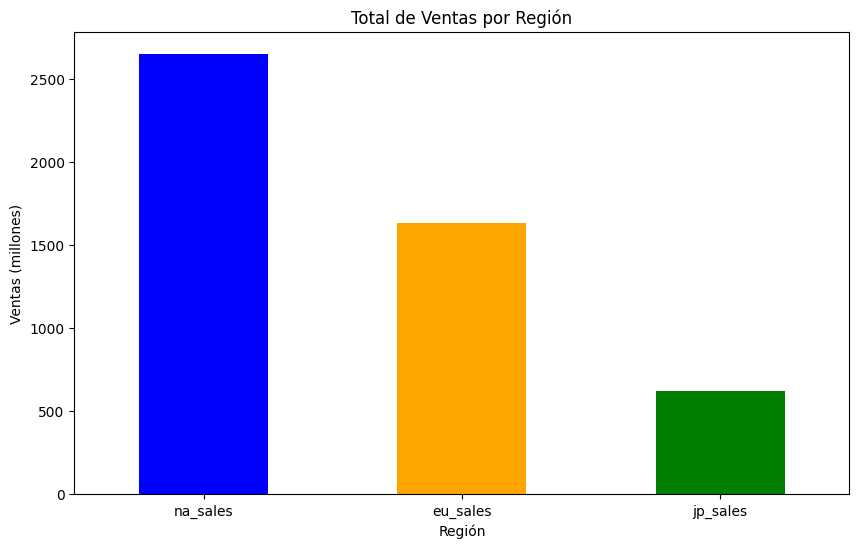

In [23]:
# Mostrar datos de las ventas en cada region (NA, UE, JP)
ventas_resumen = df_games[['na_sales', 'eu_sales', 'jp_sales']].describe()  
print(ventas_resumen)  

# hacer la grafica de ventas por region  (NA, UE, JP)
ventas_por_region = df_games[['na_sales', 'eu_sales', 'jp_sales']].sum()  
  
plt.figure(figsize=(10, 6))  
ventas_por_region.plot(kind='bar', color=['blue', 'orange', 'green'])  
plt.title('Total de Ventas por Región')  
plt.xlabel('Región')  
plt.ylabel('Ventas (millones)')  
plt.xticks(rotation=0)  
plt.show()  

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

La grafica de comparacion de ventas entre las regiones nos muestra una diferencia muy clara entre ellas, y Norte america presenta la mayor cantidad de ventas en comparacion con europa y japon.
</div>

In [ ]:
# filtrar el data frame con las 5 plataformas principales y agruparlas para analizar sus ventas
plataformas_principales = df_games['platform'].value_counts().head(5).index
df_top_platforms = df_games[df_games['platform'].isin(plataformas_principales)]

ventas_por_region = df_top_platforms.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

ventas_por_region.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Región de las 5 Plataformas Más Populares')
plt.ylabel('Ventas (en millones)')
plt.xlabel('Plataforma')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

En la grafica anterior se puede observar la variacion de las ventas de cada plataforma en las regiones de Norte America, Europa y Japon. 

La diferencia de ventas en norte america es superior que las otras regiones en todas las plataformas.
</div>

In [ ]:
# filtrar los 5 generos mas populares y graficarlo
genre_counts = df_games['genre'].value_counts().head(5)  
 
plt.figure(figsize=(12, 6))  
sns.barplot(x=genre_counts.index, y=genre_counts.values)    
plt.title('Distribución de Juegos por Género')  
plt.xlabel('Género')  
plt.ylabel('Cantidad de Juegos')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', alpha=0.3)  
plt.tight_layout()  
plt.show() 

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

En la grafica anterior podemos identificar claramente los 5 generos mas populas y que el genero de accion es el que predomina en la cantidad de juegos disponibles al publico.
</div>

In [ ]:
# filtrar por la clasificacion y ver las ventas por region
ventas_por_rating = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

ventas_por_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Impacto del Rating en las Ventas por Región')
plt.ylabel('Ventas (en millones)')
plt.xlabel('Rating')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Observando la grafica de clasificaciones de los juegos, podemos decir que si hay un impacto aparente en las ventas segun la clasificacion del juego.
</div>

# Paso 5. Pruebas de hipótesis

1) con un alpha = 0.05

- Hipotesis nula -

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipotesis Alternativa-

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.



In [ ]:
# Filtrar los datos para XOne y PC
df_filtered = df_games[df_games['user_score'] != 'tbd'].copy() 
df_filtered['user_score'] = pd.to_numeric(df_filtered['user_score'], errors='coerce')

xone_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score'].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = levene(xone_scores, pc_scores)

print("Prueba de Levene para igualdad de varianzas")
print(f"Valor p: {levene_p:.4f}")
# Determinar si asumimos varianzas iguales o no
equal_var = levene_p > 0.05
if levene_p > 0.05:
    print('Las varianzas son iguales.')
else:
    print('Las varianzas no son iguales.')
    
# Prueba t de Student
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=equal_var) 

print("Prueba t de Student")
print(f"Valor p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio no son iguales.")
else:
    print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Para hacer la prueba de hipotesis se nos pide analizar los datos para ver si los promedios de las calificaciones de los usuarios son iguales para la plataforma XOne y PC; por lo que esto se convierte en nuestra hipotesis nula, y la hipotesis alterna seria decir que el promedio de las calificaciones de los usuarios entre XOne y PC son diferentes.

Utilizando un alpha de 0.5 y con los resultados obtenidos de la prueba T Test concluimos en que los promedios de las calificaciones para ambas plataformas son diferentes.
</div>

2) con un alpha = 0.05

- Hipotesis nula -

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

- Hipotesis Alternativa-

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
# Filtrar los datos para los generos accion y deporte
df_filtered_genres = df_games[(df_games['genre'].isin(['Action', 'Sports'])) & (df_games['user_score'] != 'tbd')].copy()
df_filtered_genres['user_score'] = pd.to_numeric(df_filtered_genres['user_score'], errors='coerce')

action_scores = df_filtered_genres[df_filtered_genres['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_filtered_genres[df_filtered_genres['genre'] == 'Sports']['user_score'].dropna()

# Prueba de Levene para igualdad de varianzas
levene_stat2, levene_p2 = levene(action_scores, sports_scores)

print("Prueba de Levene para igualdad de varianzas")
print(f"Valor p: {levene_p2:.4f}")
# Determinar si asumimos varianzas iguales o no
equal_var2 = levene_p2 > 0.05
if levene_p2 > 0.05:
    print('Las varianzas son iguales.')
else:
    print('Las varianzas no son iguales.')
# Prueba t de Student
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=equal_var2) 

print("Prueba t de Student")
print(f"Valor p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio no son iguales.")
else:
    print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>RESPUESTA DEL ESTUDIANTE</b> <a class="tocSkip"></a>

Ya se agrego al codigo la prueba de levne para analizar si las varianzas de los grupos en comparacion son iguales o no, y segun el resultado, este valor True o False lo jalamos a la linea de codigo de la prueba T test y realizar el analisis para la comparacion de las medias de las muestras.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de las pruebas de levene para mostrar el supuesto de varianzas iguales. Sigue disfrutando los siguientes cursos!

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Para hacer la segunda prueba de hipotesis se nos pide analizar los datos para ver si los promedios de las calificaciones de los usuarios son idiferentes para los generos de accion y deportes; por lo que esto se convierte en nuestra hipotesis alternativa, ya que por regla la hipotesis nula debe asumir que las comparaciones son iguales.

Utilizando un alpha de 0.5 y con los resultados obtenidos de la prueba T Test concluimos en que los promedios de las calificaciones para ambas generos son diferentes.
</div>

# Paso 6.  Escribe una conclusión general

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante</b> <a class="tocSkip"></a>

Despues de realizar un analisis con los datos proporcionados de la venta de juegos de diferentes plataformas en las regiones a nivel mundial; podemos observar una amplia variedad de informacion, pero podemos concluir diciendo que Norte America es el cliente principal en la compra de juegos para las plataformas con mas ventas a nivel mundial.

Tambien podemos observar que con el paso del tiempo las plataformas tienen un promedio de ventas en años menor que en los 80's y 90's, y esto empuja a las plataformas a lanzar nuevas consolas mas seguido.

De tantas plataformas que estan consideradas en los datos, las de mayor venta son las de la familia de Play station y Xbox, Nintendo pretende competir pero no se acerca tanto; y los juegos de PC tienen mucha venta a lo largo de los años pero no con tanto repunte como las plataformas ya mencionadas.

Y finalmete podemos darnos cuernta que el auge de ventas de videojuegos se disparo grandemente a partir del año 2000, y este dato pudiera tener influencia porque los niños que jugaron videojuegos en los 80's, en los 2000's ya son padres, y comprarn juegos para ellos mismos y para sus hijos.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Enrique, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>